# Relaxation Problem for Branch Cut


Given integer $N$ and array $X$ of length $2^N$.

By multiplying $1,1j,-1$ or $-1j$ to each value, we can get $2^N$ complex values.

Maximize the absolute value of the sum of these $2^N$ complex values.


-1=-1, sum(x.real for x in Xs)=-7.0, sum(x.imag for x in Xs)=-3.0


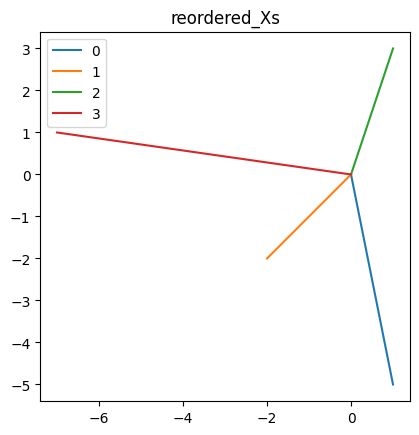

0=0, sumYsReal=9.0, sumYsImag=13.0, sumYsReal**2 + sumYsImag**2=250.0


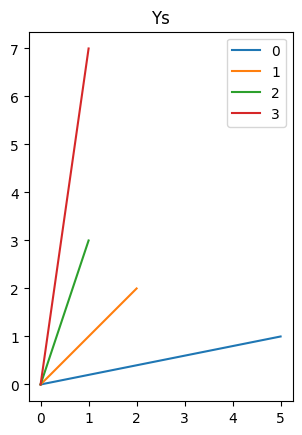

i=0, sumYsReal=3.0, sumYsImag=17.0, sumYsReal**2 + sumYsImag**2=298.0


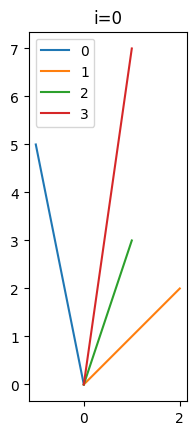

i=1, sumYsReal=-1.0, sumYsImag=17.0, sumYsReal**2 + sumYsImag**2=290.0


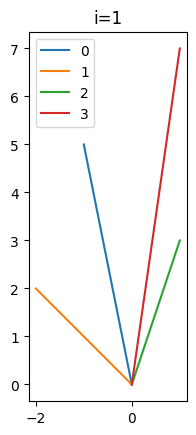

i=2, sumYsReal=-5.0, sumYsImag=15.0, sumYsReal**2 + sumYsImag**2=250.0


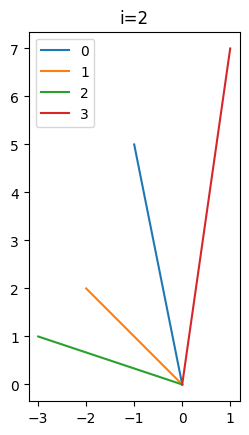

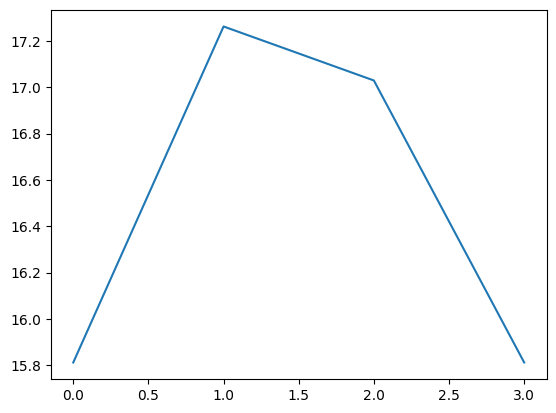

0/1/-5/-2/-2/1/3/-7/1,
1/5/1/2/2/1/3/1/7,
2/-1/5/2/2/1/3/1/7,
3/-1/5/-2/2/1/3/1/7,
4/-1/5/-2/2/-3/1/1/7

ansSlow=17.26267650163207, ansF1=17.263, ansF0=18.161
-1=-1, sum(x.real for x in Xs)=2.690975400195347, sum(x.imag for x in Xs)=-1.9754029885522284
0=0, sumYsReal=1.9754029885522284, sumYsImag=2.690975400195347, sumYsReal**2 + sumYsImag**2=11.143565571637582
i=0, sumYsReal=-1.0133295399131352, sumYsImag=2.5821135800098967, sumYsReal**2 + sumYsImag**2=7.694147296532091
n=1, seed=0, ansSlow=3.338, ansF1=3.338, ansF0=3.376
-1=-1, sum(x.real for x in Xs)=-0.11643778398346273, sum(x.imag for x in Xs)=0.24316729655674696
0=0, sumYsReal=0.34085787886688185, sumYsImag=1.9892710269216765, sumYsReal**2 + sumYsImag**2=4.073383312135651
i=0, sumYsReal=-0.760841817740755, sumYsImag=1.3448669931643842, sumYsReal**2 + sumYsImag**2=2.387547500926068
n=1, seed=1, ansSlow=2.018, ansF1=2.018, ansF0=2.024
-1=-1, sum(x.real for x in Xs)=1.784578718524613, sum(x.imag for x in Xs)=1.3407690466194895
0=0, 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product


def vis(N: int, Xs: list, title=""):
    for i in range(1 << N):
        plt.plot([0, Xs[i].real], [0, Xs[i].imag], label=f"{i}")
    plt.gca().set_aspect("equal", adjustable="box")
    if N <= 3:
        plt.legend()
    plt.title(title)
    plt.show()


def solveSlow(N: int, Xs: list):
    assert len(Xs) == 1 << N
    maxAbs = 0
    for phases in product(range(4), repeat=1 << n):
        x = 0.0 + 0.0j
        for i in range(1 << n):
            if phases[i] == 0:
                x += Xs[i]
            elif phases[i] == 1:
                x += Xs[i] * 1j
            elif phases[i] == 2:
                x += -Xs[i]
            elif phases[i] == 3:
                x += -Xs[i] * 1j
        absVal = abs(x)
        if maxAbs < absVal:
            maxAbs = absVal
    return maxAbs


def ansFast0(N: int, Xs: list):
    return sum(abs(X) for X in Xs)


def rotate(x):
    if x.imag >= 0:
        if x.real >= 0:
            return x
        else:
            return x * -1j
    else:
        if x.real <= 0:
            return -x
        else:
            return x * 1j


def ansFast1(N: int, Xs: list, do_vis: int):
    for_tex = ""

    def add_to_for_tex(idx, vals):
        nonlocal for_tex
        for_tex += f"{idx}/"
        for x in vals:
            if do_vis > 1:
                assert int(x.real) == x.real and int(x.imag) == x.imag
            for_tex += f"{int(x.real)}/{int(x.imag)}/"
        for_tex = for_tex[:-1]
        for_tex += ",\n"

    print(f"{-1=}, {sum(x.real for x in Xs)=}, {sum(x.imag for x in Xs)=}")
    rotated_Xs = [rotate(X) for X in Xs]
    Ys = rotated_Xs.copy()
    Ys.sort(key=lambda Y: (Y.imag / Y.real) if Y.real != 0 else 1e9)
    reordered_Xs = [Xs[rotated_Xs.index(Y)] for Y in Ys]
    if do_vis > 0:
        vis(N, reordered_Xs, "reordered_Xs")
    add_to_for_tex(0, reordered_Xs)
    sumYsReal = sum(Y.real for Y in Ys)
    sumYsImag = sum(Y.imag for Y in Ys)
    print(f"{0=}, {sumYsReal=}, {sumYsImag=}, {sumYsReal**2 + sumYsImag**2=}")
    maxAbs2 = sumYsReal**2 + sumYsImag**2
    absVals = [maxAbs2**0.5]
    add_to_for_tex(1, Ys)
    if do_vis > 0:
        vis(N, Ys, "Ys")
    for i in range((1 << N) - 1):
        sumYsReal += -Ys[i].real - Ys[i].imag
        sumYsImag += -Ys[i].imag + Ys[i].real
        print(f"{i=}, {sumYsReal=}, {sumYsImag=}, {sumYsReal**2 + sumYsImag**2=}")
        absVal2 = sumYsReal**2 + sumYsImag**2
        absVals.append(absVal2**0.5)
        maxAbs2 = max(maxAbs2, absVal2)
        Ys[i] *= 1j
        add_to_for_tex(i + 2, Ys)
        if do_vis > 0:
            vis(N, Ys, f"{i=}")
    if do_vis > 0:
        plt.plot(absVals)
        plt.show()
    if do_vis > 1:
        print(for_tex[:-2], end="\n\n")
    return maxAbs2**0.5


n = 2
Xs = [1 + 3j, -2 - 2j, -7 + 1j, +1 - 5j]
ansSlow = solveSlow(n, Xs)
ansF1 = ansFast1(n, Xs, 2)
ansF0 = ansFast0(n, Xs)
print(f"{ansSlow=}, {ansF1=:.3f}, {ansF0=:.3f}")

for n in [1, 2, 3]:
    for seed in range(3):
        Xs = np.random.normal(size=1 << n) + 1j * np.random.normal(size=1 << n)
        ansSlow = solveSlow(n, Xs)
        ansF1 = ansFast1(n, Xs, False)
        ansF0 = ansFast0(n, Xs)
        print(f"n={n}, seed={seed}, {ansSlow=:.3f}, {ansF1=:.3f}, {ansF0=:.3f}")
        assert np.isclose(ansSlow, ansF1)

-1=-1, sum(x.real for x in Xs)=1.029063638468784, sum(x.imag for x in Xs)=-9.187459822516107


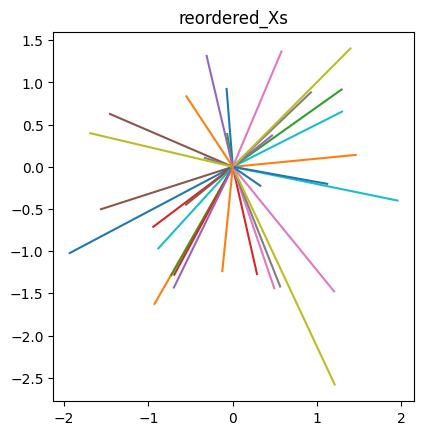

0=0, sumYsReal=30.058524162385698, sumYsImag=27.865844443982468, sumYsReal**2 + sumYsImag**2=1680.0201613969534


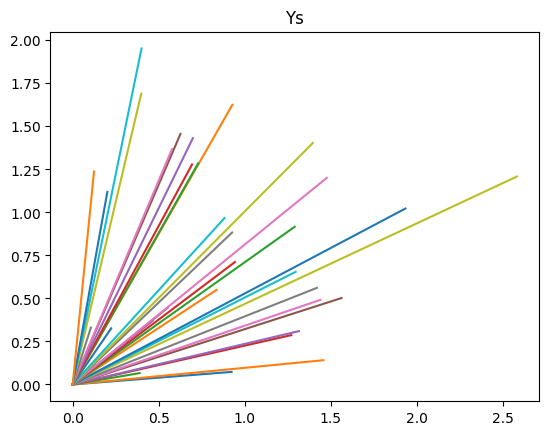

i=0, sumYsReal=29.062074841436317, sumYsImag=28.716082648928015, sumYsReal**2 + sumYsImag**2=1669.2175967893104


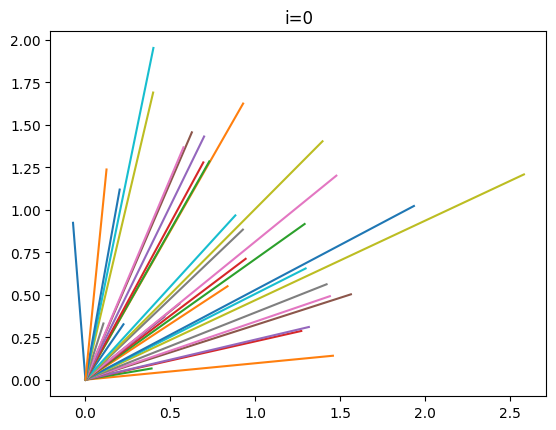

i=1, sumYsReal=27.46461639999452, sumYsImag=30.03156393195385, sumYsReal**2 + sumYsImag**2=1656.1999861978793


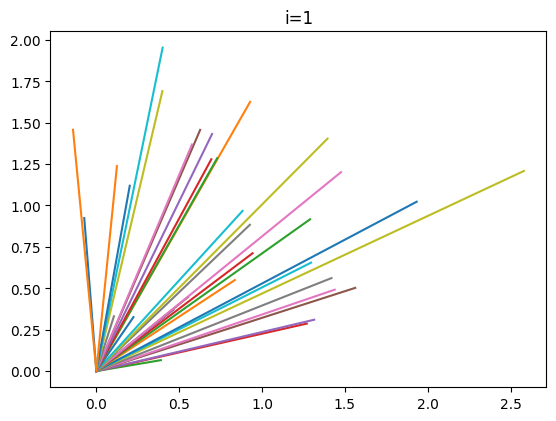

i=2, sumYsReal=27.009484030967002, sumYsImag=30.35466136549286, sumYsReal**2 + sumYsImag**2=1650.9176942328063


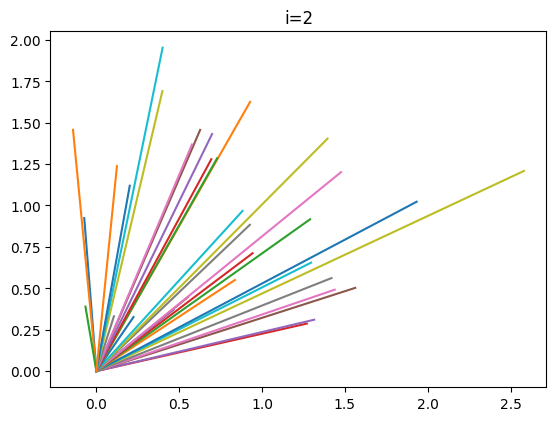

i=3, sumYsReal=25.4525624447462, sumYsImag=31.338102309866116, sumYsReal**2 + sumYsImag**2=1629.9095913873407


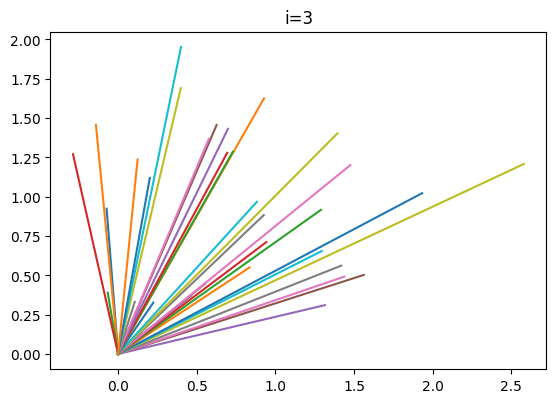

i=4, sumYsReal=23.82750962932242, sumYsImag=32.34287230403824, sumYsReal**2 + sumYsImag**2=1613.8116040107764


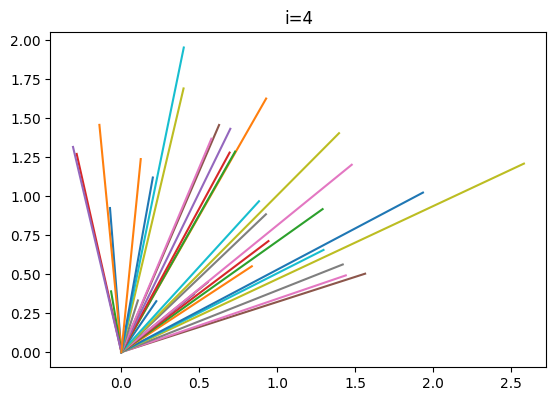

i=5, sumYsReal=21.762644946775083, sumYsImag=33.402926569023414, sumYsReal**2 + sumYsImag**2=1589.3682184549652


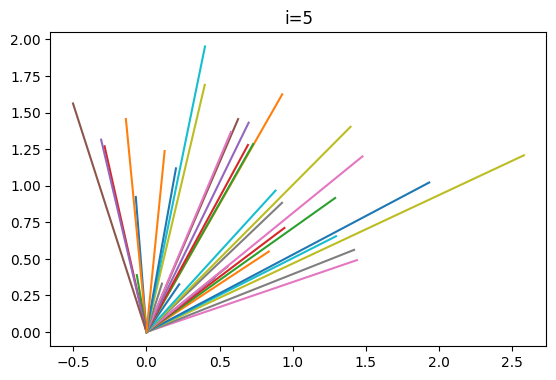

i=6, sumYsReal=19.832532543175688, sumYsImag=34.3500631432972, sumYsReal**2 + sumYsImag**2=1573.2561850246275


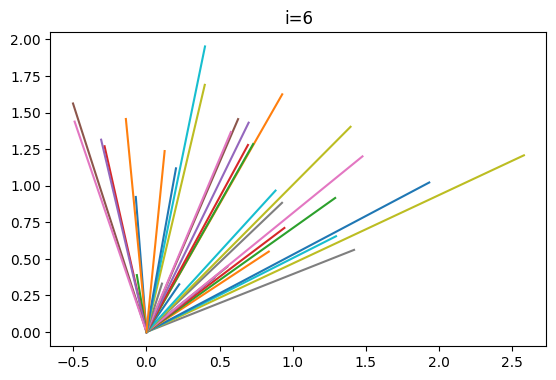

i=7, sumYsReal=17.851920823786866, sumYsImag=35.20772753534931, sumYsReal**2 + sumYsImag**2=1558.2751553021494


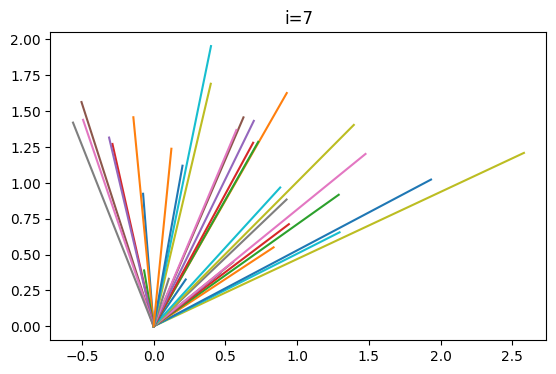

i=8, sumYsReal=14.063099228941615, sumYsImag=36.58023918988155, sumYsReal**2 + sumYsImag**2=1535.8846591120043


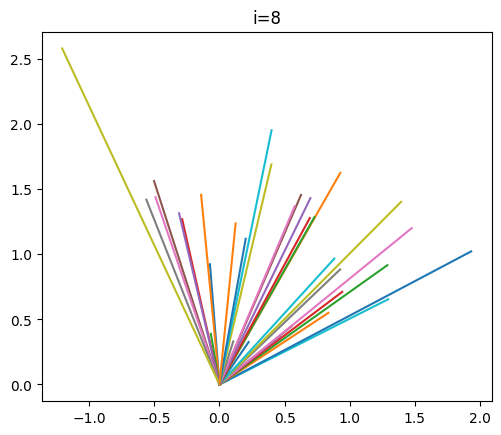

i=9, sumYsReal=12.112641419524461, sumYsImag=37.22137615967336, sumYsReal**2 + sumYsImag**2=1532.14692537788


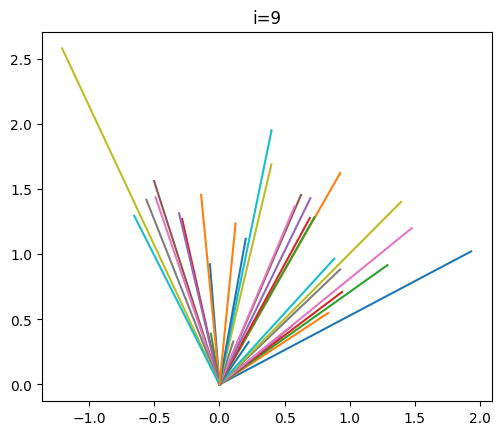

i=10, sumYsReal=9.157105216858834, sumYsImag=38.13228166048444, sumYsReal**2 + sumYsImag**2=1537.923480587141


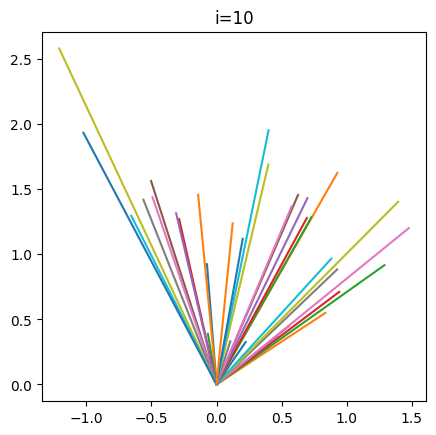

i=11, sumYsReal=7.771109189729439, sumYsImag=38.41857429191584, sumYsReal**2 + sumYsImag**2=1536.376988662154


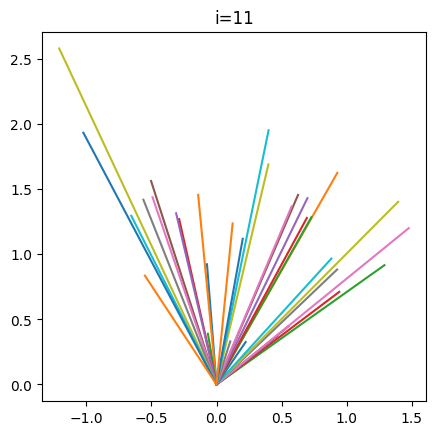

i=12, sumYsReal=5.564815926893534, sumYsImag=38.792147423958575, sumYsReal**2 + sumYsImag**2=1535.797878062344


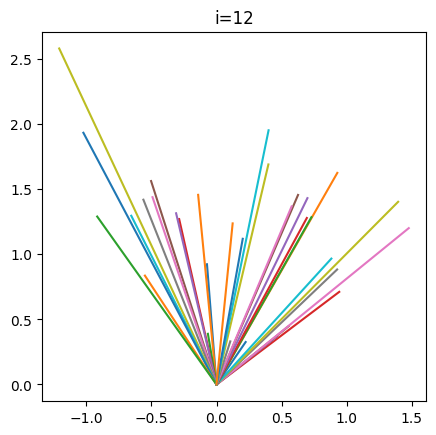

i=13, sumYsReal=3.9106027312214278, sumYsImag=39.023574494604254, sumYsReal**2 + sumYsImag**2=1538.1321800573642


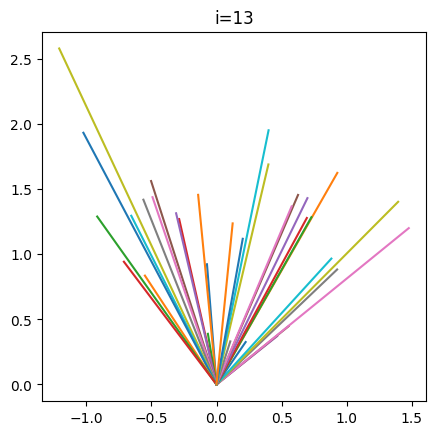

i=14, sumYsReal=3.074745917663141, sumYsImag=39.118114188190845, sumYsReal**2 + sumYsImag**2=1539.680920098524


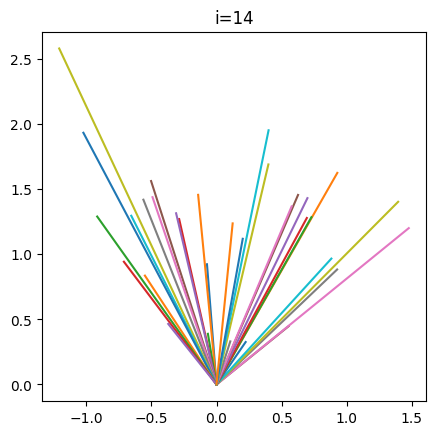

i=15, sumYsReal=2.0739571419822687, sumYsImag=39.22428692489588, sumYsReal**2 + sumYsImag**2=1542.845982993337


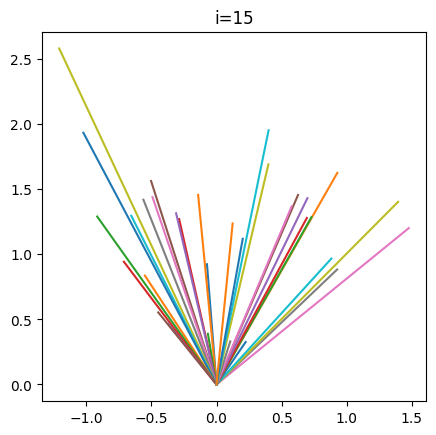

i=16, sumYsReal=-0.603587180750881, sumYsImag=39.50012006599669, sumYsReal**2 + sumYsImag**2=1560.6238027129211


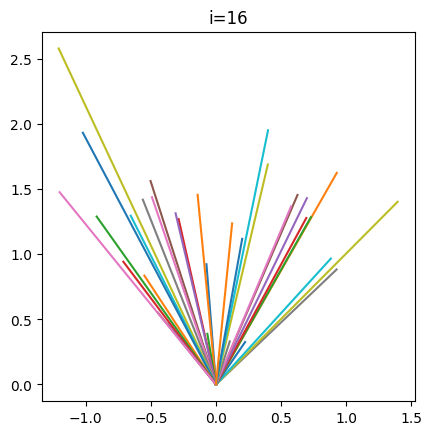

i=17, sumYsReal=-2.4133694802638783, sumYsImag=39.54348222789284, sumYsReal**2 + sumYsImag**2=1569.5113389559458


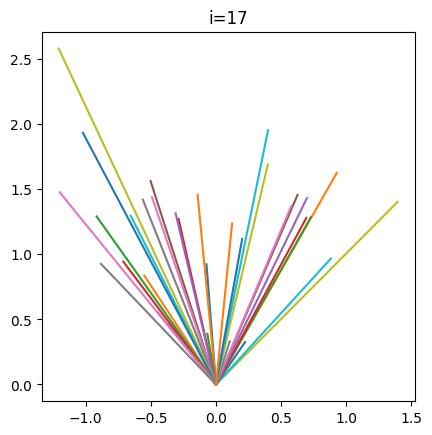

i=18, sumYsReal=-5.211685532440107, sumYsImag=39.535563031773144, sumYsReal**2 + sumYsImag**2=1590.222410328353


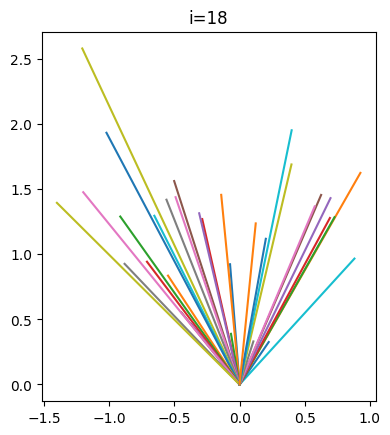

i=19, sumYsReal=-7.060801388460542, sumYsImag=39.45091027117155, sumYsReal**2 + sumYsImag**2=1606.2292374713154


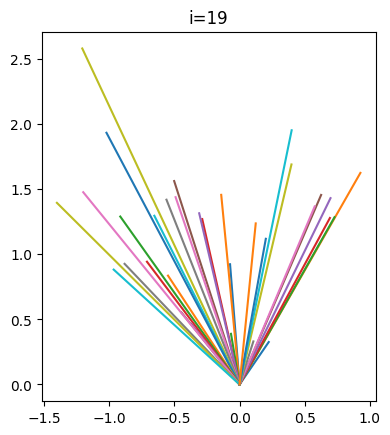

i=20, sumYsReal=-7.610724289342549, sumYsImag=39.34876038673079, sumYsReal**2 + sumYsImag**2=1606.2480681807426


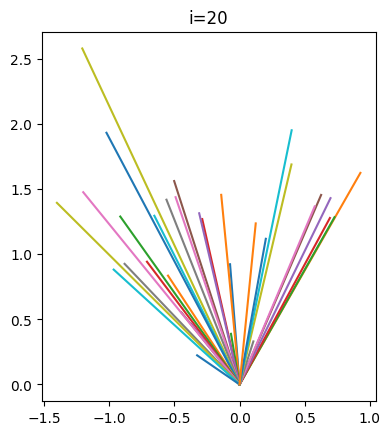

i=21, sumYsReal=-10.163854938385033, sumYsImag=38.65157680578357, sumYsReal**2 + sumYsImag**2=1597.2483367819202


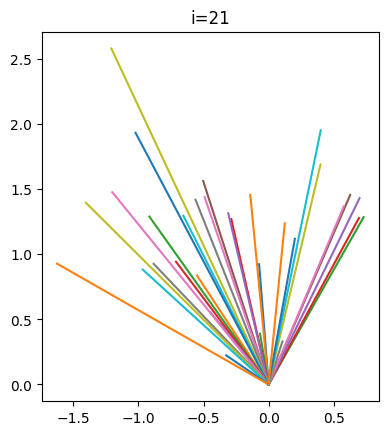

i=22, sumYsReal=-12.178143120461371, sumYsImag=38.095782527077404, sumYsReal**2 + sumYsImag**2=1599.5958162128165


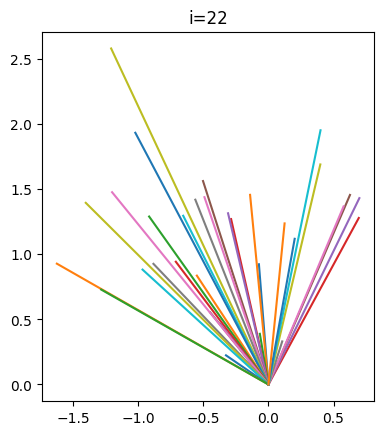

i=23, sumYsReal=-14.150654097436146, sumYsImag=37.51079517853367, sumYsReal**2 + sumYsImag**2=1607.3007663111912


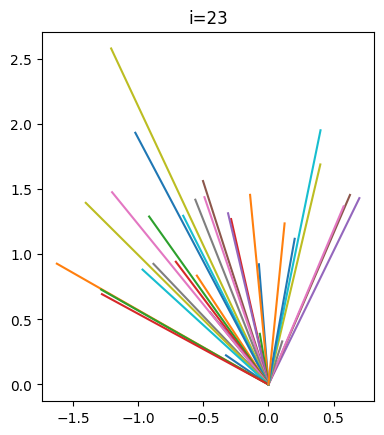

i=24, sumYsReal=-16.280221925779177, sumYsImag=36.77789483012297, sumYsReal**2 + sumYsImag**2=1617.6591740882068


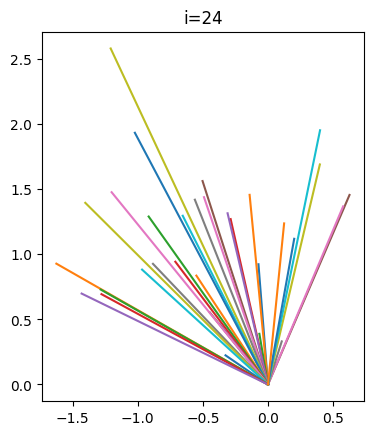

i=25, sumYsReal=-18.362209086766192, sumYsImag=35.94847040813396, sumYsReal**2 + sumYsImag**2=1629.4632472306016


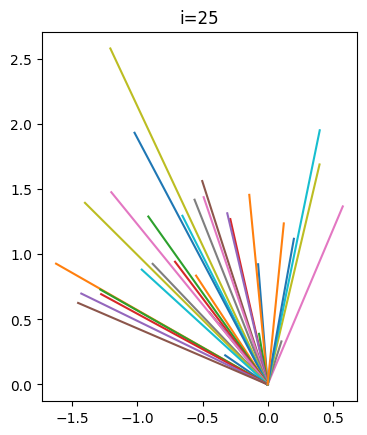

i=26, sumYsReal=-20.306873015037418, sumYsImag=35.15788195647731, sumYsReal**2 + sumYsImag**2=1648.4457553144478


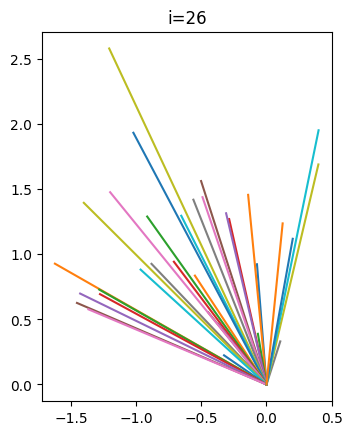

i=27, sumYsReal=-20.743598428066708, sumYsImag=34.932917821650875, sumYsReal**2 + sumYsImag**2=1650.605623279105


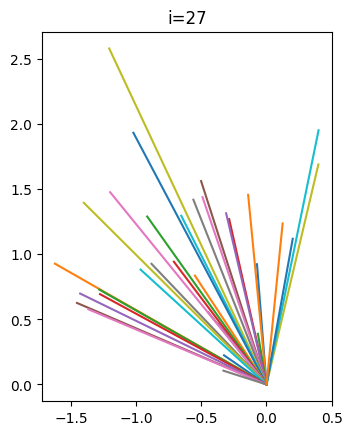

i=28, sumYsReal=-22.832017798800756, sumYsImag=33.64145681591937, sumYsReal**2 + sumYsImag**2=1653.0486534621223


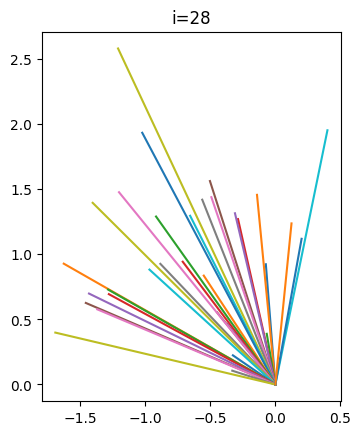

i=29, sumYsReal=-25.18434262100199, sumYsImag=32.08905598367051, sumYsReal**2 + sumYsImag**2=1663.9586271751577


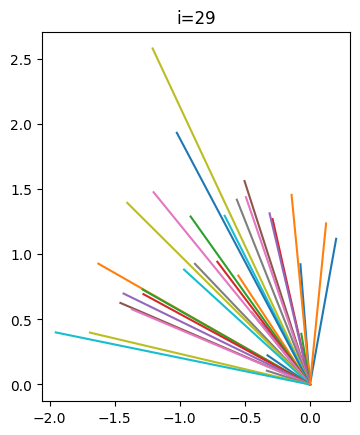

i=30, sumYsReal=-26.504708170664298, sumYsImag=31.171640864488804, sumYsReal**2 + sumYsImag**2=1674.1707493967472


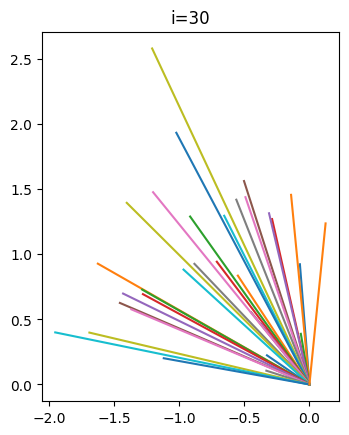

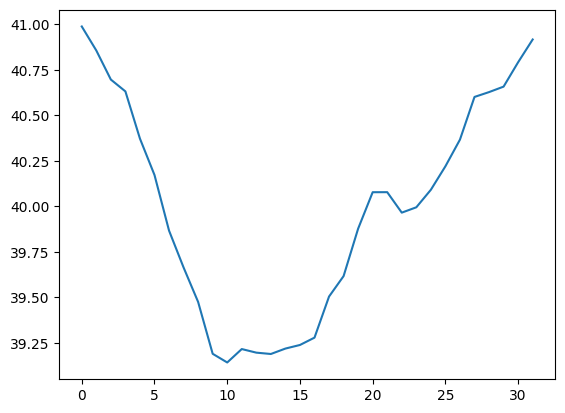

n=5, seed=0, ansF0=44.472, ansF1=40.988, t1-t0=11.22063 t2-t1=0.00003


In [2]:
import time

for n in [5]:
    for seed in range(1):
        Xs = np.random.normal(size=1 << n) + 1j * np.random.normal(size=1 << n)
        t0 = time.perf_counter()
        ansF1 = ansFast1(n, Xs, 1)
        t1 = time.perf_counter()
        ansF0 = ansFast0(n, Xs)
        t2 = time.perf_counter()
        print(
            f"n={n}, seed={seed}, {ansF0=:.3f}, {ansF1=:.3f}, {t1-t0=:.5f} {t2-t1=:.5f}"
        )